In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
import os
import logging

import pandas as pd

## Getting the CIFAR dataset into local

In [12]:
EPOCHS = 128
BATCH_SIZE = 32

# load dataset 
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

# standardize the dataset 
data_mean = np.mean(train_images)
data_std = np.std(train_images)

train_images = (train_images - data_mean) / data_std
test_images = (test_images - data_mean) / data_std


In [14]:
## Turning the labels into one-hot encoded vectors

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

#### Creating helper functions to help get overview of model details

In [6]:
train_images.shape

(50000, 32, 32, 3)

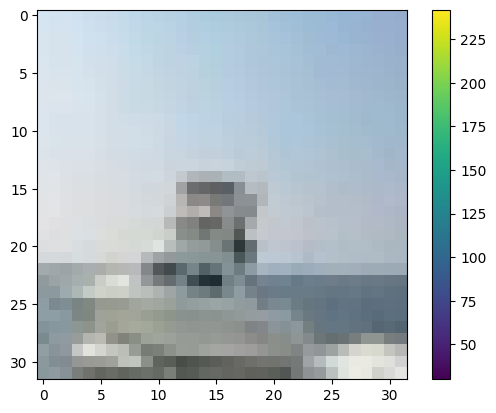

In [9]:
show_image_idx = 100

def single_image_plot(img_data):
    plt.figure()
    plt.imshow(img_data)
    plt.colorbar()
    plt.grid(False)
    plt.show()


single_image_plot(train_images[show_image_idx])

#### Building the NN using Tensorflow - Testing original model

In [ ]:

model = Sequential()

model.add(
    Conv2D(64, (5, 5),
           strides = (2, 2),
           activation = 'relu', padding = 'same',
           input_shape = (32, 32, 3),
           kernel_initializer = 'he_normal',
           bias_initializer = 'zeros')
)

model.add(
    Conv2D(64, (3, 3), 
           strides = (2, 2),
           activation = 'relu', padding = 'same',
           kernel_initializer = 'he_normal', 
           bias_initializer = 'zeros')
)

model.add(Flatten())

model.add(
    Dense(10, activation = 'softmax',
          kernel_initializer = 'glorot_uniform',
          bias_initializer = 'zeros')
)

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

model.summary()

history = model.fit(train_images, 
                    train_labels, 
                    validation_data = (test_images, test_labels),
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    shuffle = True
)

### Create a function to plot training history vs validation history

In [ ]:


def plot_history(history):

    plt.figure()
    plt.plot(history.history['accuracy'], 'b', label = 'Training accuracy')
    plt.plot(history.history['val_accuracy'], 'r', label = 'Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Using more Optimized Model

#### Model structure
- Input size = 32x32x3
- Convolution layer 1: 64 filters of size 4x4, stride = 1, padding = 'same', activation = 'relu'
- Max Pooling layer 1: pool size = 2x2, stride = 2
- Dropout layer 1: rate = 0.2

- Convolution layer 2: 64 filters of size 2x2, stride = 2, padding = 'same', activation = 'relu'
- Max Pooling layer 2: pool size = 2x2, stride = 2
- Dropout layer 2: rate = 0.2

- Convolution layer 3: 32 filters of size 3x3, stride = 1, padding = 'same', activation = 'relu'
- Max Pooling layer 3: pool size = 2x2, stride = 2
- Dropout layer 3: rate = 0.2

- Convolution layer 4: 32 filters of size 3x3, stride = 1, padding = 'same', activation = 'relu'
- Max Pooling layer 4: pool size = 2x2, stride = 2
- Dropout layer 4: rate = 0.2

- Dense layer 1: 64 neurons, activation = 'relu'
- Dropout layer 5: rate = 0.2
- Dense layer 2: 64 neurons, activation = 'relu'
- Dense layer 3: 10 neurons, activation = 'softmax'



In [22]:

model2 = Sequential()

#layer 1
model2.add(
    Conv2D(64, (4, 4),
           strides = (1, 1),
           activation = 'relu', 
           padding = 'same',
           input_shape = (32, 32, 3),
           kernel_initializer = 'he_normal',
           bias_initializer = 'zeros')
)

model2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model2.add(Dropout(0.2))


#layer 2
model2.add(
    Conv2D(64, (2, 2),
           strides = (2, 2),
           activation = 'relu', 
           padding = 'same',
           kernel_initializer = 'he_normal',
           bias_initializer = 'zeros',
           dropout = 0.2)
)

model2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model2.add(Dropout(0.2))

#layer 3
model2.add(
    Conv2D(32, (3, 3),
           strides = (1, 1),
           activation = 'relu', 
           padding = 'same',
           kernel_initializer = 'he_normal',
           bias_initializer = 'zeros',
           dropout = 0.2)
)

model2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model2.add(Dropout(0.2))

#layer 4
model2.add(
    Conv2D(32, (3, 3),
           strides = (1, 1),
           activation = 'relu', 
           padding = 'same',
           kernel_initializer = 'he_normal',
           bias_initializer = 'zeros',
           dropout = 0.2)
)

model2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model2.add(Dropout(0.2))


model2.add(Flatten())

model2.add(
    Dense(64, activation = 'relu',
          kernel_initializer = 'glorot_uniform',
          bias_initializer = 'zeros')
)
model2.add(Dropout(0.2))


model2.add(
    Dense(64, activation = 'relu',
          kernel_initializer = 'glorot_uniform',
          bias_initializer = 'zeros')
)


model.add(
    Dense(10, activation = 'softmax',
          kernel_initializer = 'glorot_uniform',
          bias_initializer = 'zeros')
)

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

model.summary()

history_2 = model.fit(train_images, 
                    train_labels, 
                    validation_data = (test_images, test_labels),
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    shuffle = True
)

TypeError: ('Keyword argument not understood:', 'dropout')

In [ ]:


def save_model(model, model_name):
    model.save(model_name + '.h5')
    print('Model saved as {}'.format(model_name + '.h5'))

save_model(model, 'cifar10_model')

In [ ]:
## create a function to write the weights to a file

def write_weights(model, model_name):
    model.save_weights(model_name + '.h5')
    print('Weights saved as {}'.format(model_name + '.h5'))

In [29]:
## load the model and weights

def load_model(model_name):
    model = keras.models.load_model(model_name, compile=False)
    print('Model loaded from {}'.format(model_name + '.h5'))
    return model

m2 = load_model('./models/model_tf_optimised/cifar10_model_opt.h5')

m2.summary()

Model loaded from ./models/model_tf_optimised/cifar10_model_opt.h5.h5
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          16448     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                  

In [30]:
m2.predict(test_images)

2023-10-10 08:59:47.754683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 6ms/step


array([[6.6700163e-03, 7.3078629e-03, 2.8783606e-02, ..., 1.2795547e-02,
        5.0213947e-03, 4.9704770e-03],
       [3.5570048e-02, 7.4528116e-01, 3.8431908e-04, ..., 4.1999147e-06,
        1.8496361e-01, 3.3408195e-02],
       [5.1953949e-02, 3.5641670e-02, 3.7653025e-02, ..., 5.3851949e-03,
        7.6345581e-01, 1.5808951e-02],
       ...,
       [9.5194596e-04, 1.0898138e-04, 8.8746272e-02, ..., 4.1492969e-02,
        2.8953646e-04, 1.5956529e-04],
       [1.1533535e-02, 9.3401968e-01, 1.3190899e-03, ..., 3.7175836e-04,
        9.0270117e-03, 4.1010700e-02],
       [2.6874202e-06, 4.2419179e-09, 1.5765958e-04, ..., 9.9331748e-01,
        1.7421142e-10, 6.3228775e-08]], dtype=float32)

### Building the performance curves


In [34]:
perf_df = pd.read_csv('./model_performance/optimized_tf_history/opt_model_history_df.csv')


In [35]:
perf_df.head()

,training_loss,validation_loss,training_accuracy,validation_accuracy
0,1.888602,1.568621,0.27396,0.4158
1,1.583648,1.401774,0.40318,0.4893
2,1.449119,1.243587,0.46420,0.5483
3,1.357873,1.212356,0.50326,0.5642
4,1.302509,1.157678,0.52726,0.5857


In [37]:
perf_df['epochs'] = perf_df.index + 1

### Building the Loss and Accuracy curves for validation and training data

### Plotting the Loss - Training vs. Validation

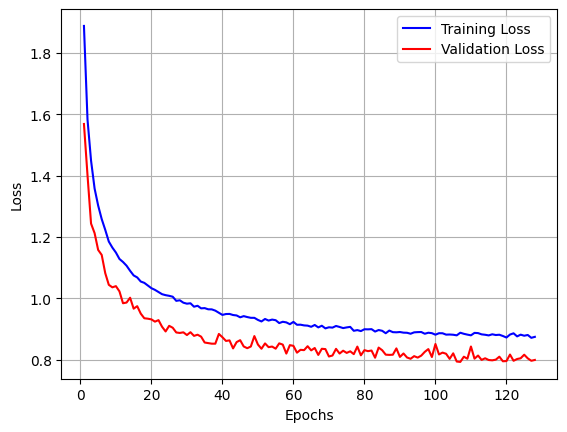

In [39]:
plt.figure()
plt.plot(perf_df['epochs'].values, perf_df['training_loss'].values, 'b', label = 'Training Loss')
plt.plot(perf_df['epochs'].values, perf_df['validation_loss'].values, 'r', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### Plotting the Accuracy - Training vs. Validation

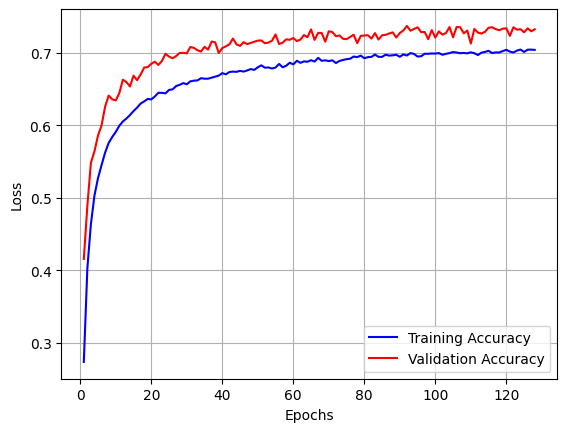

In [40]:
plt.figure()
plt.plot(perf_df['epochs'].values, perf_df['training_accuracy'].values, 'b', label = 'Training Accuracy')
plt.plot(perf_df['epochs'].values, perf_df['validation_accuracy'].values, 'r', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()